# 多项式回归

使用sklearn封装的多项式回归的步骤：
- 使用
[sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) 对数据进行升维，添加多项式系数，degree=n 将原数据变换为原数据的从 0-n 次
- 对数据进行归一化处理
- 将上一步 transfrom 的特征矩阵传入线性回归中
- 用[pipleline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline)将上述步骤封装

In [1]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)


poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [2]:
poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [3]:
y_predict = poly_reg.predict(X)

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

<Figure size 640x480 with 1 Axes>

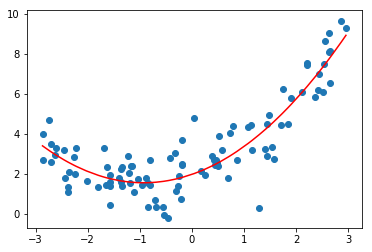

In [5]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

piple 可以把多个评估器链接成一个 ,你只要对数据调用 fit和 predict 一次来适配所有的一系列评估器  

管道中的所有评估器，除了最后一个评估器，管道的所有评估器必须是转换器。 (例如，必须有 transform 方法). 最后一个评估器的类型不限（转换器、分类器等等）  
使用一系列 (key, value) 键值对来构建,其中 key 是你给这个步骤起的名字， value 是一个评估器对象:
更多使用细节，[参考](https://sklearn.apachecn.org/#/docs/38?id=_51113-%e5%b5%8c%e5%a5%97%e5%8f%82%e6%95%b0)

# 偏差和方差

模型误差=偏差+方差+必不可少的误差

参数模型通常是高偏差算法，因为对数据的假设较强；   
非参数模型通常是高方差算法，因为不对数据进行任何假设

导致偏差的原因：对问题本身的假设有误、模型太简单   
导致方差的原因： 数据的扰动、模型太复杂

通常多数算法都可以调节偏差和方差

偏差和方差是矛盾的

机器学习的主要挑战在于方差

解决高方差的方案：
1. 降低数据维度、降噪 
2. 降低模型复杂度
3. 增加样本集
4. 使用验证集
5. 正则化